# Image Analysis - Thrash from recycling material

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from pathlib import *
from os import path
from shutil import copyfile

## Preparing data

2527 images of glass, paper, cardboard, plastic, metal and trash.

In [3]:
data_path = os.getcwd() + '/data'
splitted_data_path = os.getcwd() + '/splitted_data'
train_data_path = splitted_data_path + '/train'
test_data_path = splitted_data_path + '/test'
sub_directories = [sub_dir[0] for sub_dir in os.walk(data_path)]
del sub_directories[0]
if path.exists(splitted_data_path) == False:
    os.mkdir(splitted_data_path)
if path.exists(train_data_path) == False:
    os.mkdir(train_data_path)
if path.exists(test_data_path) == False:
    os.mkdir(test_data_path)
for directory in sub_directories:
    material_type = directory.split('/')[-1]
    material_train_path = train_data_path + '/' + material_type
    material_test_path = test_data_path + '/' + material_type
    if path.exists(material_train_path) == False:
        os.mkdir(material_train_path)
    if path.exists(material_test_path) == False:
        os.mkdir(material_test_path)
    images_list = os.listdir(directory)
    n_images = len(images_list)
    n_train_images = math.ceil(0.8 * n_images)
    n_test_images = n_images - n_train_images
    for i in range(n_train_images):
        old_train_path = directory + '/' + images_list[i]
        new_train_path = train_data_path + '/' + material_type + '/' + images_list[i]
        copyfile(old_train_path, new_train_path)
    for i in range(n_test_images):
        old_test_path = directory + '/' + images_list[i]
        new_test_path = test_data_path + '/' + material_type + '/' + images_list[i]
        copyfile(old_test_path, new_test_path)

In [4]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 128
epochs = 15

In [15]:
train_image_gen = ImageDataGenerator(rescale=1./255)

In [16]:
train_data_gen = train_image_gen.flow_from_directory(batch_size=batch_size, directory=train_data_path, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 474 images belonging to 6 classes.


In [6]:
test_image_gen = ImageDataGenerator(rescale=1./255)

In [7]:
test_data_gen = test_image_gen.flow_from_directory(batch_size=batch_size,directory=test_data_path,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')

Found 503 images belonging to 6 classes.


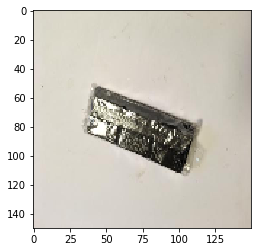

In [9]:
plt.imshow(sample_training_images[2])

In [10]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [13]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=n_train_images // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=n_test_images // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 4 steps
Epoch 1/15
3/3 [==============================] - 11s 4s/step - loss: -18.1113 - accuracy: 0.1875 - val_loss: -73.6772 - val_accuracy: 0.1988
Epoch 2/15
3/3 [==============================] - 10s 3s/step - loss: -140.2524 - accuracy: 0.1719 - val_loss: -322.2711 - val_accuracy: 0.1988
Epoch 3/15
3/3 [==============================] - 10s 3s/step - loss: -476.5131 - accuracy: 0.2161 - val_loss: -981.4526 - val_accuracy: 0.1988
Epoch 4/15
3/3 [==============================] - 10s 3s/step - loss: -1355.0613 - accuracy: 0.2188 - val_loss: -2528.5928 - val_accuracy: 0.1988
Epoch 5/15
3/3 [==============================] - 9s 3s/step - loss: -3371.2224 - accuracy: 0.1979 - val_loss: -5868.4185 - val_accuracy: 0.1988
Epoch 6/15
3/3 [==============================] - 9s 3s/step - loss: -7854.1663 - accuracy: 0.2005 - val_loss: -1

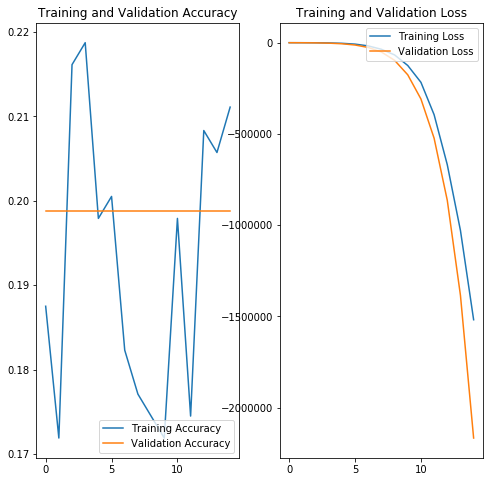

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augementation 

We can see, by the last graph, that the model is classifying poorly, with a stable training accuracy of around 20%. I will start by trying to augment the training data with versions of the images that are rotated or zoomed.

In [15]:
train_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.5, rotation_range=45,width_shift_range=.15, height_shift_range=.15)

In [16]:
train_data_gen = train_image_gen.flow_from_directory(batch_size=batch_size, directory=train_data_path, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 2024 images belonging to 6 classes.


In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=n_train_images // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=n_test_images // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 4 steps
Epoch 1/15
3/3 [==============================] - 12s 4s/step - loss: -2476090.5000 - accuracy: 0.2083 - val_loss: -3309750.0000 - val_accuracy: 0.1988
Epoch 2/15
3/3 [==============================] - 13s 4s/step - loss: -3619348.5833 - accuracy: 0.2083 - val_loss: -4939361.1250 - val_accuracy: 0.1988
Epoch 3/15
3/3 [==============================] - 13s 4s/step - loss: -5876958.8333 - accuracy: 0.1615 - val_loss: -7223047.0000 - val_accuracy: 0.1988
Epoch 4/15
3/3 [==============================] - 12s 4s/step - loss: -7840382.8333 - accuracy: 0.2005 - val_loss: -10378405.2500 - val_accuracy: 0.1988
Epoch 5/15
3/3 [==============================] - 12s 4s/step - loss: -12765358.6667 - accuracy: 0.1432 - val_loss: -14674118.7500 - val_accuracy: 0.1988
Epoch 6/15
3/3 [==============================] - 13s 4s/step - loss: -15355287.3333 - accuracy: 0.1849 - val_loss: -20407102.0000 - val_accuracy: 

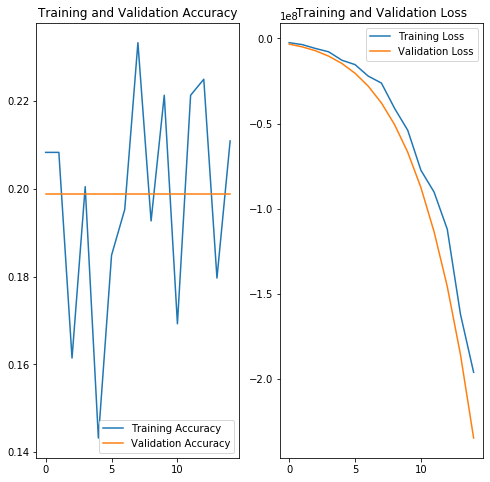

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Adding Dropouts

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [21]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [22]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=n_train_images // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=n_test_images // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 4 steps
Epoch 1/15
3/3 [==============================] - 13s 4s/step - loss: -20.5182 - accuracy: 0.1849 - val_loss: -71.4621 - val_accuracy: 0.1988
Epoch 2/15
3/3 [==============================] - 12s 4s/step - loss: -261.4502 - accuracy: 0.1927 - val_loss: -384.8393 - val_accuracy: 0.1988
Epoch 3/15
3/3 [==============================] - 12s 4s/step - loss: -1055.7853 - accuracy: 0.2188 - val_loss: -1411.7939 - val_accuracy: 0.1988
Epoch 4/15
3/3 [==============================] - 12s 4s/step - loss: -2722.6012 - accuracy: 0.2292 - val_loss: -4200.3776 - val_accuracy: 0.1988
Epoch 5/15
3/3 [==============================] - 12s 4s/step - loss: -6744.0942 - accuracy: 0.2031 - val_loss: -10662.0823 - val_accuracy: 0.1988
Epoch 6/15
3/3 [==============================] - 12s 4s/step - loss: -19052.5319 - accuracy: 0.1849 - val_loss: -23614.5093 - val_accuracy: 0.1988
Epoch 7/15
3/3 [=====================

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()